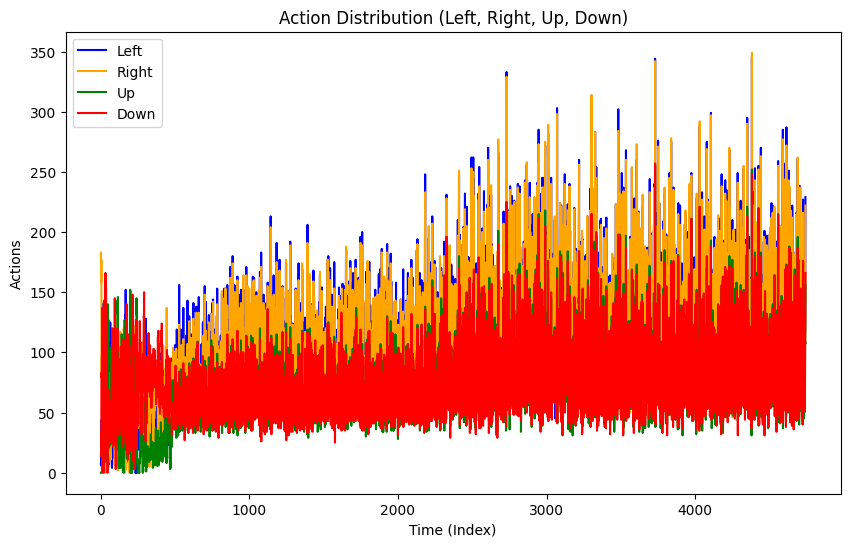

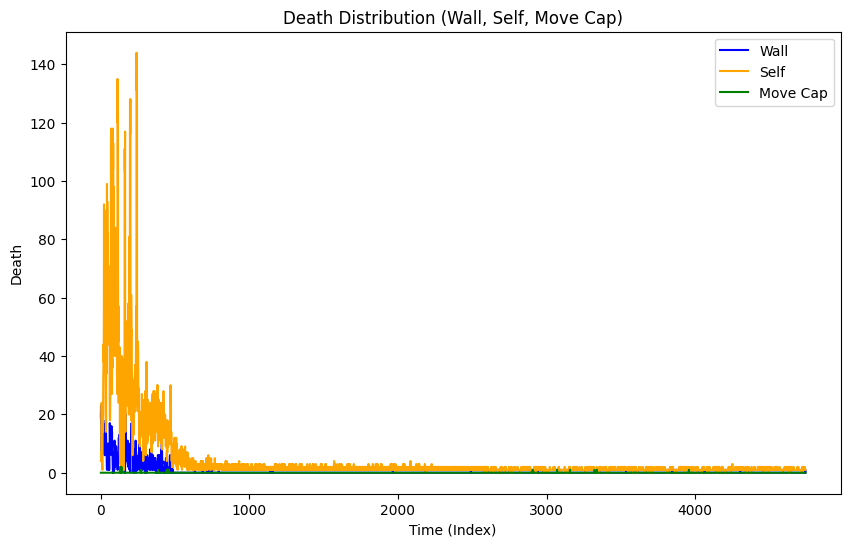

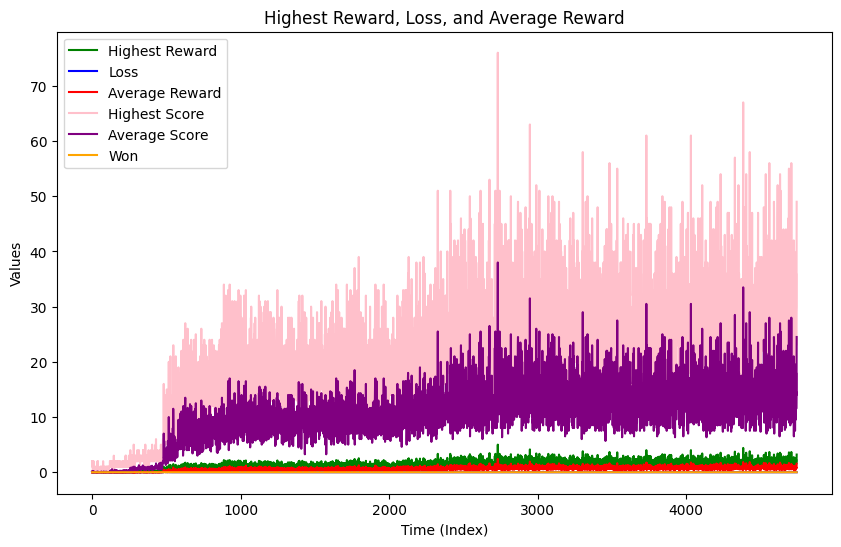

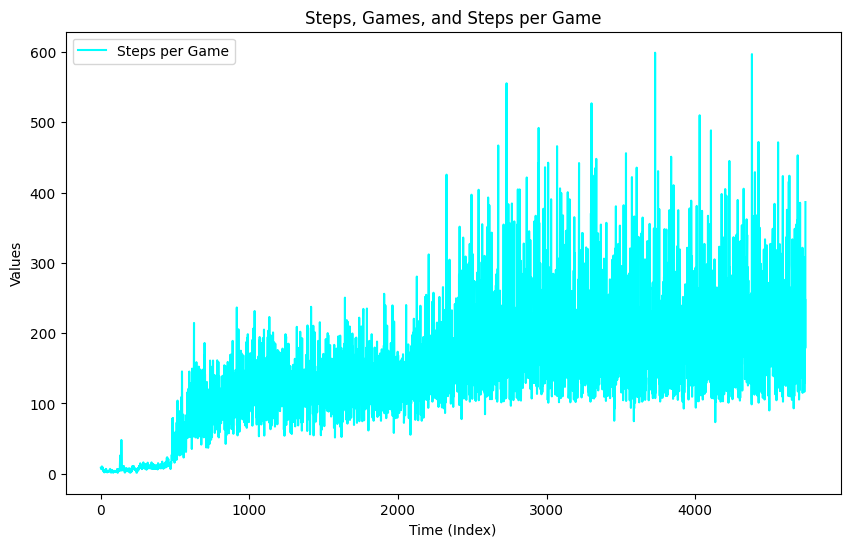

In [557]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to parse and visualize the CSV data
def parse_and_visualize_csv(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Convert the 'time' column to a datetime object if it's a timestamp
    if 'time' in df.columns and not pd.api.types.is_numeric_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'])
    
    # 1. Line graph for left, right, up, down actions
    plt.figure(figsize=(10, 6))
    
    # Plot line graph for left, right, up, down
    plt.plot(df.index, df['left'], label='Left', color='blue')
    plt.plot(df.index, df['right'], label='Right', color='orange')
    plt.plot(df.index, df['up'], label='Up', color='green')
    plt.plot(df.index, df['down'], label='Down', color='red')

    # Adding labels and title
    plt.xlabel('Time (Index)')
    plt.ylabel('Actions')
    plt.title('Action Distribution (Left, Right, Up, Down)')
    plt.legend()
    plt.show()


    plt.figure(figsize=(10, 6))
    
    # Plot line graph for left, right, up, down
    plt.plot(df.index, df['death_by_wall'], label='Wall', color='blue')
    plt.plot(df.index, df['death_by_self'], label='Self', color='orange')
    plt.plot(df.index, df['death_wasted_moves'], label='Move Cap', color='green')


    # Adding labels and title
    plt.xlabel('Time (Index)')
    plt.ylabel('Death')
    plt.title('Death Distribution (Wall, Self, Move Cap)')
    plt.legend()
    plt.show()

    # 2. Plot highest reward, loss, and average reward over time (or index)
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['highest_reward'], label='Highest Reward', color='green')
    plt.plot(df.index, df['loss'], label='Loss', color='blue')
    plt.plot(df.index, df['average_reward'], label='Average Reward', color='red')
    plt.plot(df.index, df['max_score'], label='Highest Score', color='pink')
    plt.plot(df.index, df['avg_score'], label='Average Score', color='purple')

    plt.plot(df.index, df['wons'], label='Won', color='orange')


        # 2. Plot highest reward, loss, and average reward over time (or index)


    # Adding labels and title
    plt.xlabel('Time (Index)')
    plt.ylabel('Values')
    plt.title('Highest Reward, Loss, and Average Reward')
    plt.legend()
    plt.show()

    # 3. Plot steps, games, and steps per game
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['step_per_games'], label='Steps per Game', color='cyan')

    # Adding labels and title
    plt.xlabel('Time (Index)')
    plt.ylabel('Values')
    plt.title('Steps, Games, and Steps per Game')
    plt.legend()
    plt.show()

# Example usage
parse_and_visualize_csv('models/new_arch_multi_size_2/train_log.csv')






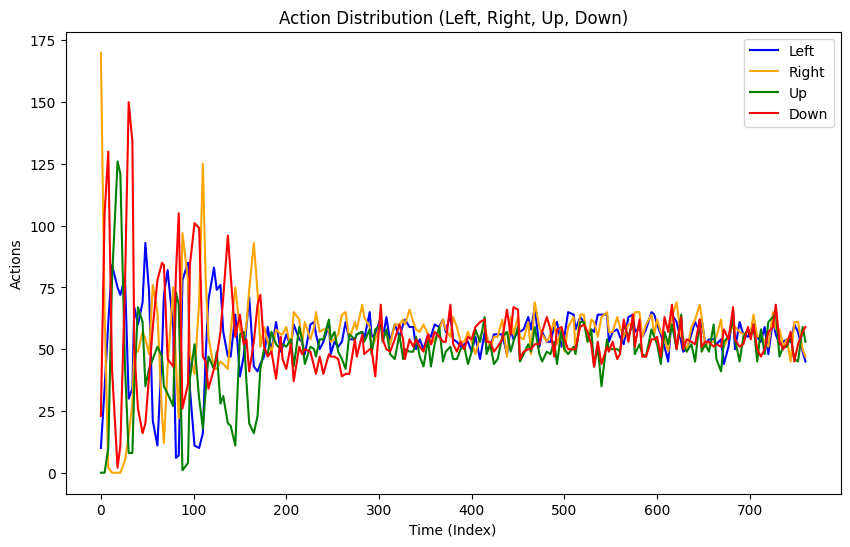

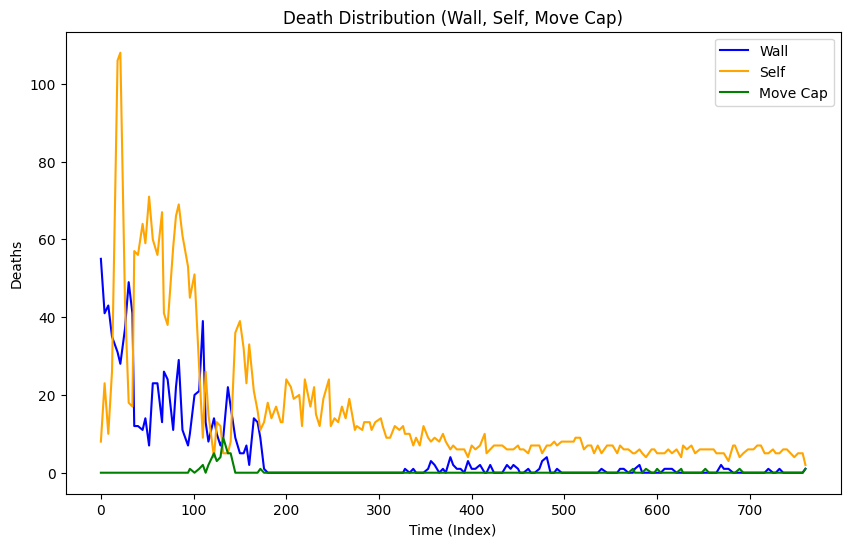

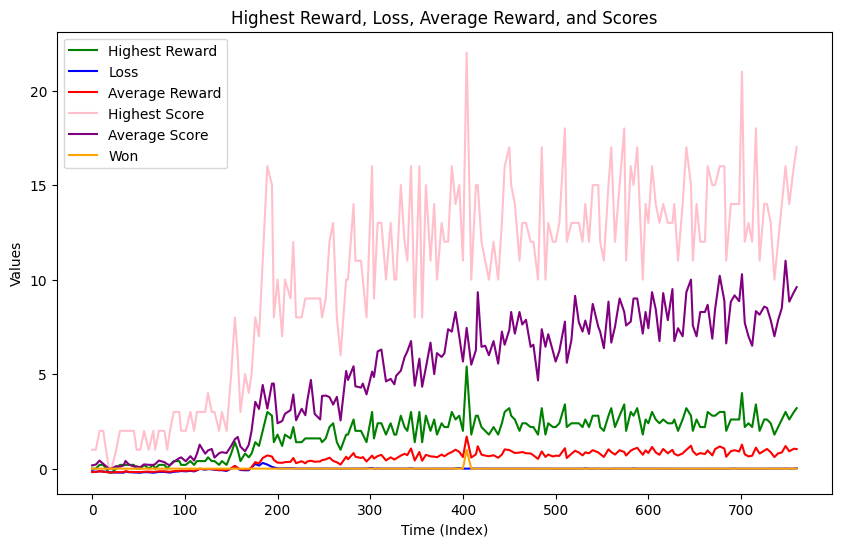

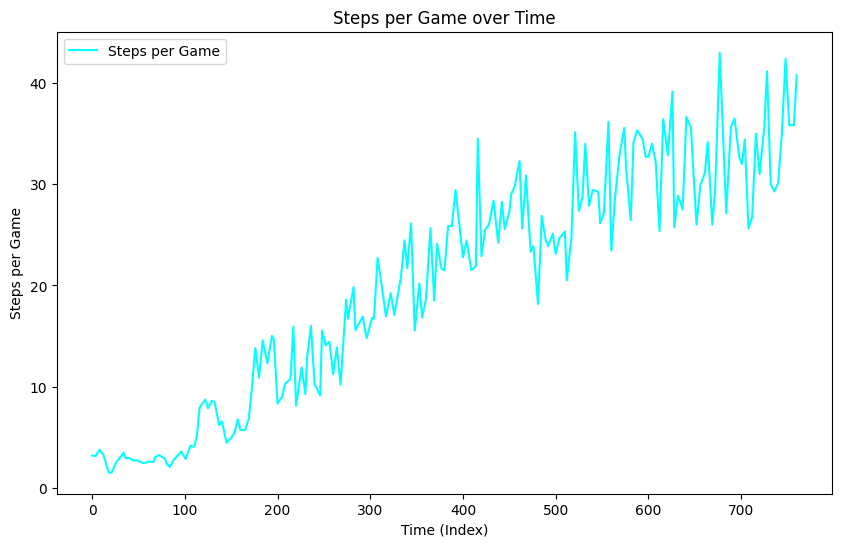

In [558]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a function to parse and visualize the CSV data with shape filtering
def parse_and_visualize_csv(file_path, shape_value=None):
    # Read the CSV file
    df = pd.read_csv(file_path)

    # Convert the 'time' column to a datetime object if it's a timestamp
    if 'time' in df.columns and not pd.api.types.is_numeric_dtype(df['time']):
        df['time'] = pd.to_datetime(df['time'])
    
    # Fill NaN values with 0 or use interpolation
    df.fillna(0, inplace=True)

    # Check if 'shape' column exists and filter by the specified shape value
    if shape_value is not None and 'shape' in df.columns:
        df = df[df['shape'] == shape_value]
        if df.empty:
            print(f"No data found for shape: {shape_value}")
            return

    # Check if expected columns exist in the dataframe
    expected_columns = ['left', 'right', 'up', 'down', 'death_by_wall', 'death_by_self', 
                        'death_wasted_moves', 'highest_reward', 'loss', 'average_reward', 
                        'max_score', 'avg_score', 'wons', 'step_per_games']
    
    for col in expected_columns:
        if col not in df.columns:
            print(f"Warning: {col} column not found in CSV.")
    
    # 1. Line graph for left, right, up, down actions
    plt.figure(figsize=(10, 6))
    if all(col in df.columns for col in ['left', 'right', 'up', 'down']):
        plt.plot(df.index, df['left'], label='Left', color='blue')
        plt.plot(df.index, df['right'], label='Right', color='orange')
        plt.plot(df.index, df['up'], label='Up', color='green')
        plt.plot(df.index, df['down'], label='Down', color='red')

        plt.xlabel('Time (Index)')
        plt.ylabel('Actions')
        plt.title('Action Distribution (Left, Right, Up, Down)')
        plt.legend()
        plt.show()

    # 2. Line graph for death causes (wall, self, move cap)
    plt.figure(figsize=(10, 6))
    if all(col in df.columns for col in ['death_by_wall', 'death_by_self', 'death_wasted_moves']):
        plt.plot(df.index, df['death_by_wall'], label='Wall', color='blue')
        plt.plot(df.index, df['death_by_self'], label='Self', color='orange')
        plt.plot(df.index, df['death_wasted_moves'], label='Move Cap', color='green')

        plt.xlabel('Time (Index)')
        plt.ylabel('Deaths')
        plt.title('Death Distribution (Wall, Self, Move Cap)')
        plt.legend()
        plt.show()

    # 3. Plot highest reward, loss, average reward, max score, etc.
    plt.figure(figsize=(10, 6))
    if all(col in df.columns for col in ['highest_reward', 'loss', 'average_reward', 'max_score', 'avg_score', 'wons']):
        plt.plot(df.index, df['highest_reward'], label='Highest Reward', color='green')
        plt.plot(df.index, df['loss'], label='Loss', color='blue')
        plt.plot(df.index, df['average_reward'], label='Average Reward', color='red')
        plt.plot(df.index, df['max_score'], label='Highest Score', color='pink')
        plt.plot(df.index, df['avg_score'], label='Average Score', color='purple')
        plt.plot(df.index, df['wons'], label='Won', color='orange')

        plt.xlabel('Time (Index)')
        plt.ylabel('Values')
        plt.title('Highest Reward, Loss, Average Reward, and Scores')
        plt.legend()
        plt.show()

    # 4. Plot steps per game
    plt.figure(figsize=(10, 6))
    if 'step_per_games' in df.columns:
        plt.plot(df.index, df['step_per_games'], label='Steps per Game', color='cyan')

        plt.xlabel('Time (Index)')
        plt.ylabel('Steps per Game')
        plt.title('Steps per Game over Time')
        plt.legend()
        plt.show()

# Example usage
parse_and_visualize_csv('models/new_arch_multi_size_a/train_log.csv', shape_value=5)
